## Report on Clustering Analysis
##### Author: DK Yuan
##### Date: 9/13/2022


In [1]:
import glob
import pandas as pd
import numpy as np

##### Data cleaning with the exact same code (just some adjustment on naming the columns) 

In [2]:
months_f = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL']

months_n = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul']

months_d = dict(zip(months_f, months_n))

file_dir= 'grocery_project/'
year = 2022
rootDir = file_dir+ str(year)+'/'
#filter by these columns for now
filter_vars = ['sku', 'type', 'quantity', 'product_sales','total', 'date_time', 'description',\
              'selling_fees', 'fba_fees', 'other_transaction_fees', 'other']

#create empty df 
df = {}

for f,n in months_d.items():

    filename = "2022" + n + 'MonthlyUnifiedTransaction.csv'
    path = rootDir+f+'/'+filename
    
    df[f] = pd.read_csv(path, header=[7], low_memory=False)
    
    #remove spaces
    df[f].columns = df[f].columns.str.replace(' ', '_')
    df[f].columns = df[f].columns.str.replace("/", '_')
    
    #df[f] = df[f][filter_vars]
    
    #df[f] = df[f].add_suffix('_'+f)
    

    df[f] = df[f].rename(columns={df[f].columns[4]: 'sku'})
    df[f] = df[f].rename(columns={df[f].columns[0]: 'date_time'})

    print(f+' have number of transactions: ')
    print(df[f].shape[0])
    print(f+' have number of unique products: ')
    
    print(len(set(df[f]['sku'])))

JAN have number of transactions: 
50202
JAN have number of unique products: 
2320
FEB have number of transactions: 
33811
FEB have number of unique products: 
2214
MAR have number of transactions: 
40655
MAR have number of unique products: 
2189
APR have number of transactions: 
37061
APR have number of unique products: 
2145
MAY have number of transactions: 
32927
MAY have number of unique products: 
1844
JUN have number of transactions: 
30224
JUN have number of unique products: 
1710
JUL have number of transactions: 
29807
JUL have number of unique products: 
2040


#### Pick the specific month/months (all) for the analysis

In [3]:
#months=['JAN', 'FEB', 'MAR']
### I just selected all for overall review but you can customize the months list
months=months_f 
df_list=[]
for month in months:
    df_list.append(df[month])
df_selected=pd.concat(df_list)

In [4]:
## sku contrains nan
sku_list=list(set(df_selected['sku']))
sku_list.remove(np.nan)

### Filtering - Orders Only (Optional)

In [5]:
### Select Columns that you might want to filter like 'type','account_type' and 'type'
df_selected=df_selected[df_selected['type']=='Order']

### Categorical Data Transformation

#### Instead of Filtering, you might consider get dummy for some features

In [6]:
### New columns [fulfillment_Amazon, fulfilment_Seller] are created as a binary variable
df_selected=pd.get_dummies(df_selected, columns=['fulfillment'])
df_selected.columns

Index(['date_time', 'settlement_id', 'type', 'order_id', 'sku', 'description',
       'quantity', 'marketplace', 'account_type', 'order_city', 'order_state',
       'order_postal', 'tax_collection_model', 'product_sales',
       'product_sales_tax', 'shipping_credits', 'shipping_credits_tax',
       'gift_wrap_credits', 'giftwrap_credits_tax', 'promotional_rebates',
       'promotional_rebates_tax', 'marketplace_withheld_tax', 'selling_fees',
       'fba_fees', 'other_transaction_fees', 'other', 'total',
       'Regulatory_Fee', 'Tax_On_Regulatory_Fee', 'fulfillment_Amazon',
       'fulfillment_Seller'],
      dtype='object')

#### However if you are interested in geographic features, you probably need some clearer data

In [7]:
len(set(df_selected["order_state"]))

557

In [8]:
len(set(df_selected["order_city"]))

20503

#### Protential dummy?

In [9]:
set(df_selected['account_type'])

{'Invoiced Orders', 'Standard Orders'}

In [10]:
df[f].columns

Index(['date_time', 'settlement_id', 'type', 'order_id', 'sku', 'description',
       'quantity', 'marketplace', 'account_type', 'fulfillment', 'order_city',
       'order_state', 'order_postal', 'tax_collection_model', 'product_sales',
       'product_sales_tax', 'shipping_credits', 'shipping_credits_tax',
       'gift_wrap_credits', 'giftwrap_credits_tax', 'Regulatory_Fee',
       'Tax_On_Regulatory_Fee', 'promotional_rebates',
       'promotional_rebates_tax', 'marketplace_withheld_tax', 'selling_fees',
       'fba_fees', 'other_transaction_fees', 'other', 'total'],
      dtype='object')

### Select Important Metrics

In [11]:
### Numeric Features & dummy variables we just created
## ValueError: could not convert string to float: '1,599.99' ---input error
## convert columns to numeric
## col_selected is similar to var_filter 
col_selected= ['quantity', 'product_sales','total','selling_fees', 'fba_fees','selling_fees', 'fba_fees','fulfillment_Amazon', 'fulfillment_Seller']
for col in col_selected:
    try:
        df_selected[col]=df_selected[col].replace(',', '').astype(float)
    except ValueError:
        df_selected[col]=df_selected[col].str.replace(',', '').astype(float)

In [12]:
### Sum numeric value for one sku
sku_dict={}
for sku in sku_list:
    temp=df_selected[df_selected['sku']==sku][col_selected]
    sku_dict[sku]=np.array(temp.sum())
### Create a sku-based dataframe    
df_sku=pd.DataFrame(sku_dict).transpose().rename(columns=dict(zip(range(len(col_selected)),col_selected)))
df_sku.shape ## Total 3857 sku

(3870, 9)

### Kmean Clustering from 2-20 clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 536, cost: 28563.0
Run 1, iteration: 2/100, moves: 16, cost: 28561.0
Run 1, iteration: 3/100, moves: 0, cost: 28561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 271, cost: 27261.0
Run 2, iteration: 2/100, moves: 0, cost: 27261.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 199, cost: 26663.0
Run 3, iteration: 2/100, moves: 0, cost: 26663.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 619, cost: 26856.0
Run 4, iteration: 2/100, moves: 13, cost: 26856.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 94, cost: 27485.0
Run 5, iteration: 2/100, moves: 0, cost: 27485.0
Init: initializing centroids
Init: initializing cl

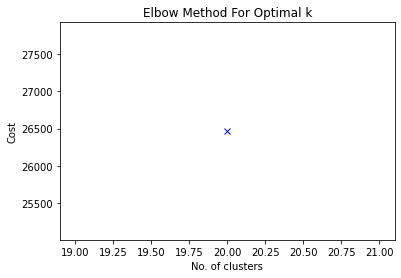

In [87]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

cost = []
K=20
kmode = KModes(n_clusters=K, init = "random", n_init =50, verbose=1)
kmode.fit_predict(df_sku)
cost.append(kmode.cost_)
  
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=8, init = "random", n_init = 100, verbose=1)
clusters = kmode.fit_predict(df_sku)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45, cost: 27909.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 48, cost: 27922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15, cost: 28050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 27631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 4, cost: 28389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 214, cost: 27540.0
Run 6, iteration: 2/100, moves: 2, cost: 27540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 71, cost: 27948.0
Init: initializing centroids
Init: initial

array([0, 0, 4, ..., 0, 0, 7], dtype=uint16)

### Distribution of the clusters

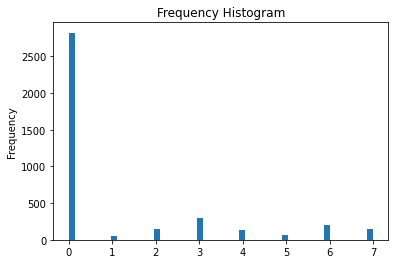

In [17]:
plt.hist(clusters, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [18]:
### pick a cluster index
df_sku[df_sku['clusters']==3].index

Index(['E112185814000184101', 'E126054100138019101', 'E126049200007228102',
       'E112764302901419106', 'E120074471113224102', 'E126041165280104101',
       'E126071618115134104', 'E112679948101386108', 'E122828545110127103',
       'E112813958009915103',
       ...
       'E146850004234020103', 'E126074471002108101', 'E128191169075234101B',
       'E110079400263780106', 'E136718604972349103', 'E133038000121654101',
       'E110011111121140102', 'E120030000261927104', 'E126044300120822101',
       'E120020000104539106'],
      dtype='object', length=292)

In [23]:
info_list=['description','quantity']
cluster_index=3
top_n_product=10
df[f][df[f]['sku'].isin(df_sku[df_sku['clusters']==cluster_index].index)][info_list][0:top_n_product]

,description,quantity
134,"Meow Mix Indoor Formula Dry Cat Food, 3.15 Lbs",1.0
137,Nonni's Thin Addictives Pistachio Almond Thins...,1.0
260,L'Oreal Paris Age Perfect Facial Day Cream SPF...,1.0
263,"No-Rinse Shampoo, 8 fl oz - Leaves Hair Fresh,...",1.0
353,Cavendish And Harvey Candy (3 Pack) Fruit Hard...,1.0
404,Krusteaz Banana Quick Bread 15 OZ (Pack of 3),1.0
517,Fox's U-Bet Vanilla Syrup (20 Oz Bottle),1.0
672,"Kashi Breakfast Cereal, Vegan Protein, Organic...",1.0
692,Arm & Hammer Ultra Max Antiperspirant Deodoran...,1.0
717,"Pickapeppa Spicy Mango Sauce, 5 Ounce (Pack of 6)",1.0


In [ ]:
### Hierarchical clustering

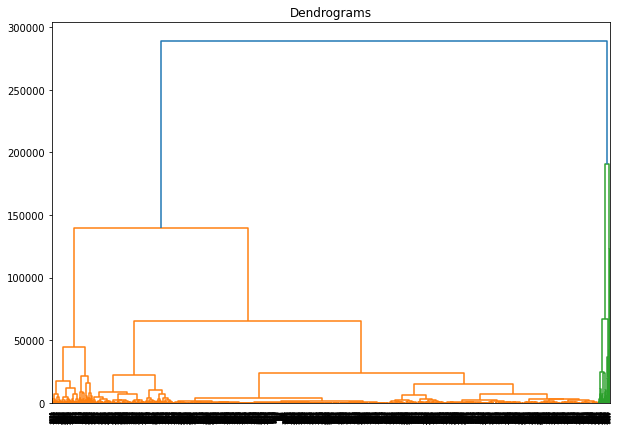

In [24]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize
data_scaled = normalize(df_sku)
data_scaled = pd.DataFrame(df_sku, columns=df_sku.columns)
data_scaled.head()

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

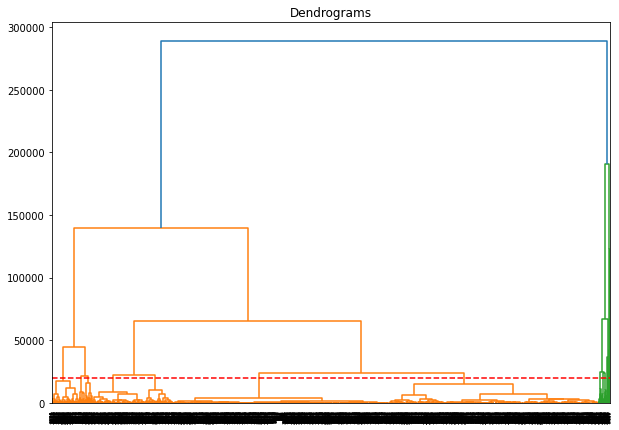

In [25]:
### Insert a dissimalirity parameter
dis=20000
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=dis, color='r', linestyle='--')

In [89]:
### show the distribution of the cluster list
def cl_dist(y_br):
    cl_dict={}
    for cl in set(y_br):
        cl_dict[cl]=len(y_br[[y_br[n]==cl for n in range(len(y_br))]])
    print(cl_dict)

In [58]:
# Training the hierarchical cluster model on the dataset
from sklearn.cluster import AgglomerativeClustering
for n in range(2,10):
    hc = AgglomerativeClustering(n_clusters = n, \
                                 affinity = 'euclidean', \
                                 linkage = 'ward')
    y_hc = hc.fit_predict(X)
    cl_dist(y_hc)

{0: 74, 1: 3796}
{0: 3796, 1: 6, 2: 68}
{0: 6, 1: 3516, 2: 68, 3: 280}
{0: 68, 1: 3516, 2: 5, 3: 280, 4: 1}
{0: 3516, 1: 280, 2: 5, 3: 17, 4: 1, 5: 51}
{0: 280, 1: 17, 2: 5, 3: 2958, 4: 1, 5: 51, 6: 558}
{0: 5, 1: 17, 2: 51, 3: 2958, 4: 1, 5: 90, 6: 558, 7: 190}
{0: 17, 1: 2958, 2: 51, 3: 2, 4: 1, 5: 90, 6: 558, 7: 190, 8: 3}


### Other Clusteriing

In [27]:
X=np.array(df_sku)

In [28]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.9, n_samples=len(X))
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
y_ms = ms.fit_predict(X)
print ("Bandwidth value: " + str(bandwidth))
print ("Number of predicted clusters: " + str(len(ms.cluster_centers_)))

Bandwidth value: 4080.1495387265954
Number of predicted clusters: 10


In [88]:
cl_dist(y_ms)

{0: 3770, 1: 73, 2: 6, 3: 8, 4: 4, 5: 2, 6: 2, 7: 1, 8: 3, 9: 1}


In [29]:
from sklearn.cluster import OPTICS

opt = OPTICS(min_samples=50, xi=.05, \
             min_cluster_size=.05, cluster_method='xi', \
             metric='minkowski', algorithm = 'auto')
y_opt = opt.fit_predict(X)

c:\users\simon\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_optics.py:904: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [32]:
from sklearn.cluster import Birch

for n in range(2,10):
    br = Birch(n_clusters=n)
    y_br = br.fit_predict(X)
    print(cl_dist(y_br))

{0: 74, 1: 3796}
None
{0: 3796, 1: 6, 2: 68}
None
{0: 6, 1: 3516, 2: 68, 3: 280}
None
{0: 68, 1: 3516, 2: 5, 3: 280, 4: 1}
None
{0: 3516, 1: 280, 2: 5, 3: 17, 4: 1, 5: 51}
None
{0: 280, 1: 17, 2: 5, 3: 2958, 4: 1, 5: 51, 6: 558}
None
{0: 5, 1: 17, 2: 51, 3: 2958, 4: 1, 5: 90, 6: 558, 7: 190}
None
{0: 17, 1: 2958, 2: 51, 3: 2, 4: 1, 5: 90, 6: 558, 7: 190, 8: 3}
None


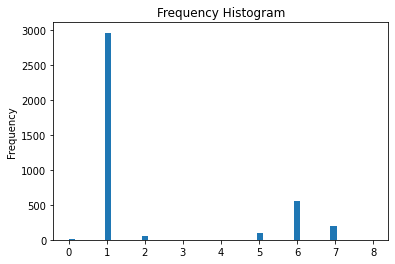

In [71]:
plt.hist(y_br, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

### Generate Cluster Dateframe as output

In [92]:
## a function for creating a dataframe for specific cluster and info your choice
def cluster_dataframe(df_sku,info_list,cluster_list,n_to_show):
    df_cluster = df_sku
    df_cluster['cluster']= cluster_list
    df_cluster[df_cluster['cluster']==cluster_index]
    df_output=df[f][df[f]['sku'].isin(df_cluster[df_cluster['cluster']==cluster_index].index)][info_list][0:n_to_show]
    return df_output

In [83]:
### pick info you need for the clusters, cluster index,and total sell
## we got the same cluster from y_br!

info_list=['description','quantity','total']
cluster_index=5
n_to_show=100
cluster_list=y_hc
cluster_dataframe(df_sku,info_list,cluster_list,n_to_show)

,description,quantity,total
0,Musselman's Natural Unsweetened Applesauce 23 oz,1.0,1.97
15,"WILD PLANET Roasted Chicken Breast, No Salt At...",1.0,13.38
17,"Master of Mixes Pina Colada Drink Mix, Ready T...",2.0,22.03
27,Frontier Co-op Organic Fair Trade Ground Ceylo...,1.0,12.33
48,"Tillen Farms Bada Bing Cherries, 13.5 oz",1.0,5.95
...,...,...,...
1098,T-Relief Arnica +12 Gel - 8.75 oz.,5.0,189.17
1141,FBA Inventory Reimbursement - Lost:Warehouse,1.0,8.59
1162,"Master of Mixes Pina Colada Drink Mix, Ready T...",1.0,11.01
1167,"Cento Red Wine Vinegar, 25.4 oz",1.0,2.75


In [85]:
cluster_index=6
n_to_show=100
cluster_list=y_hc
cluster_dataframe(df_sku,info_list,cluster_list,n_to_show)

,description,quantity,total
3,Maxwell House International Coffee Vanilla Car...,1.0,10.07
8,"Stonewall Kitchen Bittersweet Chocolate Sauce,...",1.0,7.48
13,Everlasting Gobstoppers Jawbreakers Box,1.0,17.24
32,Full Red Fully Prepared Pizza Sauce #10,1.0,7.96
47,Now and Later Giant Soft Chewy Taffy Candy (31...,1.0,9.26
...,...,...,...
510,Sally Hansen Creme Bleach Xtra Strength Face &...,1.0,8.96
514,Good Cook Classic Wood 10 Inch Rolling Pin 238...,1.0,2.53
515,Good Cook Classic Wood 10 Inch Rolling Pin 238...,1.0,17.92
516,Good Cook Classic Wood 10 Inch Rolling Pin 238...,1.0,17.92


In [91]:
### pick info you need for the clusters, cluster index,and cluster list generated above
info_list=['description','quantity','total']
cluster_index=6
n_to_show=10 # number of products you want to see
cluster_list=y_br
cluster_dataframe(df_sku,info_list,cluster_list,n_to_show)

,description,quantity,total
3,Maxwell House International Coffee Vanilla Car...,1.0,10.07
8,"Stonewall Kitchen Bittersweet Chocolate Sauce,...",1.0,7.48
13,Everlasting Gobstoppers Jawbreakers Box,1.0,17.24
32,Full Red Fully Prepared Pizza Sauce #10,1.0,7.96
47,Now and Later Giant Soft Chewy Taffy Candy (31...,1.0,9.26
49,Now and Later Giant Soft Chewy Taffy Candy (31...,3.0,29.46
52,Stonewall Kitchen Seedless Black Raspberry Jam...,1.0,6.97
55,FBA Inventory Reimbursement - Customer Service...,1.0,11.66
60,Light Pink Dum Dums Color Party - Bubble Gum F...,1.0,7.03
63,Sally Hansen Creme Bleach Xtra Strength Face &...,1.0,8.96
